In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

img=pd.read_csv('train_data.csv') #reading training data
test=pd.read_csv('test_data.csv') #reading testing data

s=test[["ID"]] #storing Class column of test data in a variable to transfer it into submission file afterwards
train_class=img['Class']

# Deleting unncessary columns from training and test file
img.drop('ID', inplace=True, axis=1)
img.drop('Class', inplace=True, axis=1)
test.drop('ID', inplace=True, axis=1)
test.drop('Class', inplace=True, axis=1)


#renaming variables for better understandibility
X_test1=test.values
X_train=img.values
y_train=train_class.values

<Figure size 640x480 with 0 Axes>

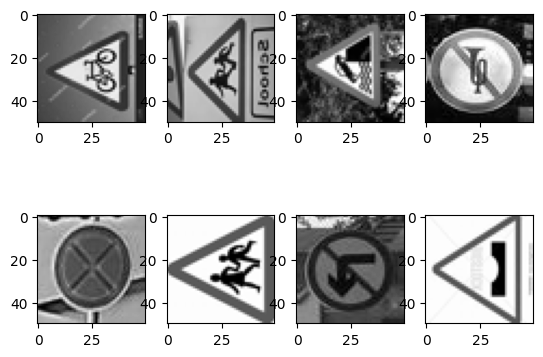

In [25]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,4) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0][0].imshow(X_train[172].reshape(50,50) ,cmap=plt.get_cmap('gray'))
axarr[0][1].imshow(X_train[900].reshape(50,50),cmap=plt.get_cmap('gray'))
axarr[0][2].imshow(X_train[202].reshape(50,50),cmap=plt.get_cmap('gray'))
axarr[0][3].imshow(X_train[204].reshape(50,50),cmap=plt.get_cmap('gray'))
axarr[1][0].imshow(X_train[287].reshape(50,50) ,cmap=plt.get_cmap('gray'))
axarr[1][1].imshow(X_train[888].reshape(50,50),cmap=plt.get_cmap('gray'))
axarr[1][2].imshow(X_train[213].reshape(50,50),cmap=plt.get_cmap('gray'))
axarr[1][3].imshow(X_train[195].reshape(50,50),cmap=plt.get_cmap('gray'))

In [31]:
from sklearn import manifold
features, target = np.array(X_train),np.array(y_train)
target = target.astype(int)
features=features.reshape(-1,2500)
tsne = manifold.TSNE(n_components=2, random_state=42)
data_tr = tsne.fit_transform(features)

/raid/home/rankitk/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/raid/home/rankitk/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [32]:
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                       data=np.column_stack((data_tr, 
                                            target)))
# cast targets column to int
cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.head()

,CP1,CP2,target
0,35.412388,-6.812754,4
1,-46.892124,21.946896,13
2,28.601070,13.371814,26
3,15.589312,-0.711241,13
4,40.589523,-33.662872,23


In [33]:
clothes_map = {
               1: 'BULLOCK PROHIBITED',
               2: 'CATTLE',
               3: 'CYCLE CROSSING',
               4: 'CYCLE PROHIBITED',
               5: 'DANGEROUS DIP',
               6: 'FALLING ROCKS',
               7: 'HEIGHT LIMIT',
               8: 'HORN PROHIBITED',
               9: 'LEFT HAND CURVE',
               10:'NARROW BRIDGE',
               11: 'NARROW ROAD AHEAD',
               12: 'NO PARKING',
               13: 'NO STOPPING OR STANDING',
               14: 'OVERTAKING PROHIBITED',
               15: 'PEDESTRIAN PROHIBITED',
               16: 'PRIORITY FOR ONCOMING VEHICLES',
               17: 'RIVER BANK',
               18: 'RIGHT HAND CURVE',
               19: 'RIGHT TURN PROHIBITED',
               20:'ROAD WIDENS AHEAD',
               21: 'ROUNDABOUT',
               22: 'SCHOOL AHEAD',
               23: 'SLIPPERY ROAD',
               24: 'STEEP ASCENT',
               25: 'STEEP DESCENT',
               26: 'STRAIGHT PROHIBITED',
               27: 'TRUCK PROHIBITED',
               28: 'T INTERSECTION',
               29: 'U-TURN PROHIBITED',
               30:'Y INTERSECTION'}
# map targets to actual clothes for plotting
cps_df.loc[:, 'target'] = cps_df.target.map(clothes_map)

<AxesSubplot:>

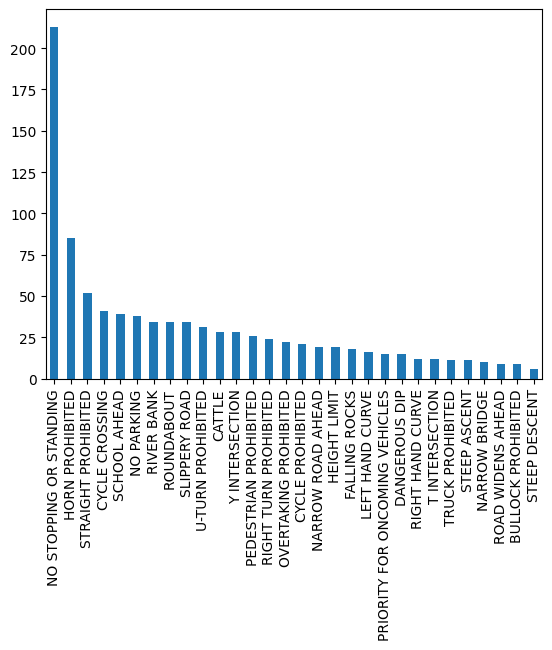

In [34]:
cps_df.target.value_counts().plot(kind='bar')

/raid/home/rankitk/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


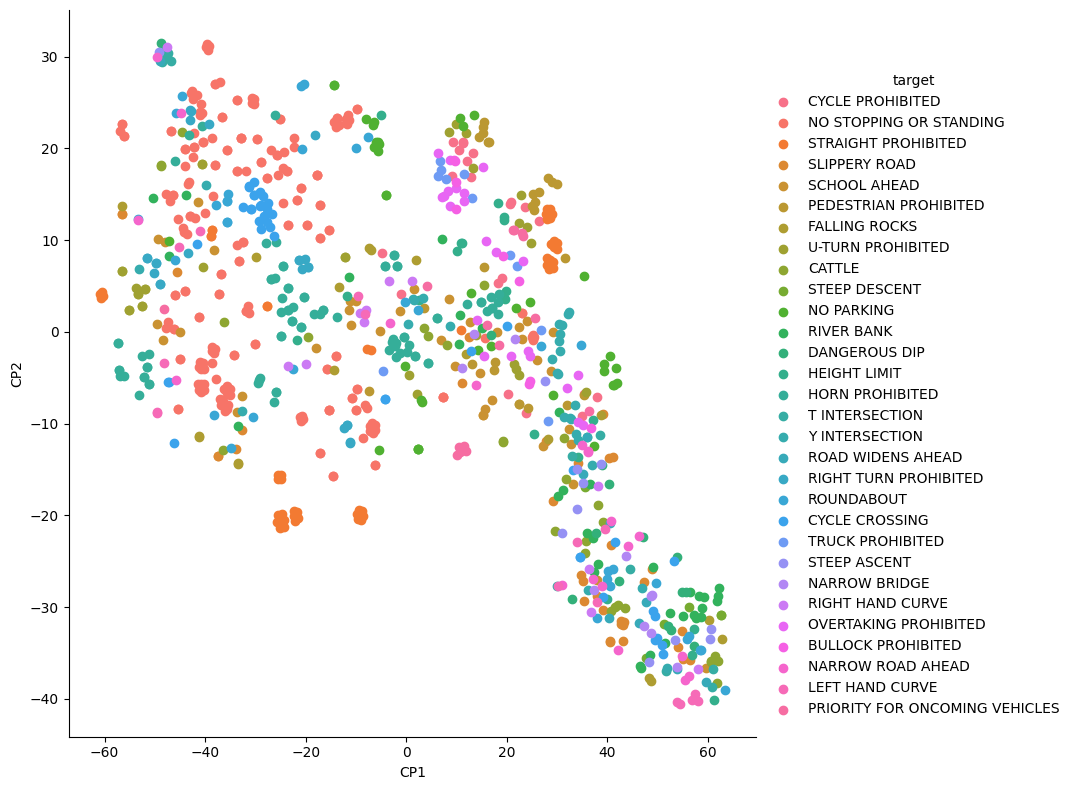

In [35]:
grid = sns.FacetGrid(cps_df, hue="target", size=8)
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()

In [4]:
#Logistic Regression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import plot_confusion_matrix
   
X = X_train
y = y_train
  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train11, X_test11, y_train11, y_test11 = train_test_split(X, y, test_size=0.2,
                                                    random_state=1, stratify=y)
# create logistic regression object
model = linear_model.LogisticRegression()
   
# train the model using the training sets
model.fit(X_train11, y_train11)
  
# making predictions on the testing set
y_pred = model.predict(X_test11)
   
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):", 
print(metrics.accuracy_score(y_test11, y_pred)*100))
#print(classification_report(y_test11, y_pred))
#plot_confusion_matrix(model,X_test11,y_test11)
#plt.show()

67.37967914438502
Logistic Regression model accuracy(in %): None


/raid/home/rankitk/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
#Decidion Tree Classifier
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
  
X = X_train
y = y_train
  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train11, X_test11, y_train11, y_test11 = train_test_split(X, y, test_size=0.2,
                                                    random_state=1,stratify=y)
  
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 150).fit(X_train11, y_train11)
y_pred = model.predict(X_test11)
  
# creating a confusion matrix
cm = confusion_matrix(y_test11, y_pred)
print(metrics.accuracy_score(y_test11, y_pred)*100)
#print(classification_report(y_test11, y_pred))
#plot_confusion_matrix(model,X_test11,y_test11)
#plt.show()

50.80213903743316


In [68]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

X_train12 = X_train/255.0

X_train12, X_test12, y_train12, y_test12 = train_test_split(X_train12, y, test_size = 0.3, train_size = 0.2 ,random_state = 10,stratify=y)

59.64285714285714
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.17      0.12      0.14         8
           3       0.80      0.67      0.73        12
           4       0.40      0.33      0.36         6
           5       0.25      0.25      0.25         4
           6       0.00      0.00      0.00         5
           7       0.29      0.33      0.31         6
           8       0.62      0.92      0.74        26
           9       0.50      0.20      0.29         5
          10       0.20      0.33      0.25         3
          11       0.15      0.33      0.21         6
          12       0.80      0.73      0.76        11
          13       0.85      0.91      0.88        64
          14       1.00      0.29      0.44         7
          15       0.75      0.75      0.75         8
          16       0.00      0.00      0.00         5
          17       0.31      0.50      0.38        10
         

/raid/home/rankitk/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/raid/home/rankitk/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/raid/home/rankitk/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/raid/home/rankitk/.lo

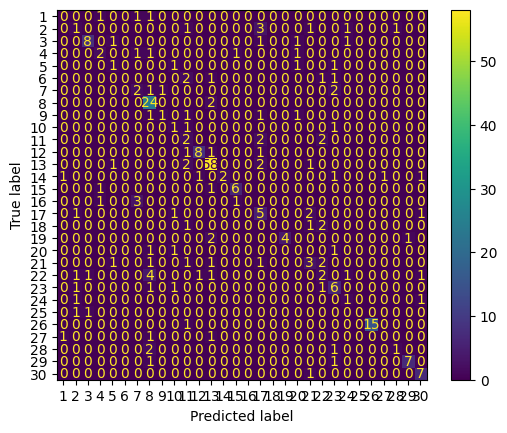

In [71]:
#Linear SVM
model = SVC(kernel='linear')
model.fit(X_train12, y_train12)

# predict
y_pred = model.predict(X_test12)
cm = confusion_matrix(y_test12, y_pred)
print(metrics.accuracy_score(y_test12, y_pred)*100)
print(classification_report(y_test12, y_pred))
plot_confusion_matrix(model,X_test12,y_test12)
plt.show()

In [76]:
#Non Linear  SVM using RBF kernel and C=1
model = SVC(kernel='rbf',C=10)
model.fit(X_train12, y_train12)

# predict
y_pred = model.predict(X_test12)
#cm = confusion_matrix(y_test12, y_pred)
print(metrics.accuracy_score(y_test12, y_pred)*100)
#print(classification_report(y_test12, y_pred))
#plot_confusion_matrix(model,X_test12,y_test12)
#plt.show()

57.85714285714286


In [100]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train13, X_test13, y_train13, y_test13 = train_test_split(X, y, test_size=0.2,
                                                    random_state=1,stratify=y)  
model = KNeighborsClassifier(n_neighbors = 3).fit(X_train13, y_train13)
model.fit(X_train13, y_train13)

# predict
y_pred = model.predict(X_test13)
cm = confusion_matrix(y_test13, y_pred)
print(metrics.accuracy_score(y_test13, y_pred)*100)
#print(classification_report(y_test13, y_pred))
#plot_confusion_matrix(model,X_test13,y_test13)
#plt.show()

59.35828877005348


In [11]:
#Naive Bayes
from sklearn.preprocessing import StandardScaler 
X_train14, X_test14, y_train14, y_test14 = train_test_split(X, y, test_size=0.2,
                                                    random_state=1,stratify=y)  
scaler = StandardScaler()
scaler.fit(X_train14)
X_train14 = scaler.transform(X_train14)
X_test14 = scaler.transform(X_test14) 
X_test141=X_test14
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train14 = pca.transform(X_train14)
X_test14 = pca.transform(X_test14)

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train14, y_train14)
y_pred = model.predict(X_test14)
cm = confusion_matrix(y_test14, y_pred)
print("Gaussian:",metrics.accuracy_score(y_test14, y_pred)*100)
#print(classification_report(y_test13, y_pred))
#plot_confusion_matrix(model,X_test13,y_test13)
#plt.show()

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train14, y_train14)
y_pred = model.predict(X_test14)
cm = confusion_matrix(y_test14, y_pred)
print("Bernoulli:",metrics.accuracy_score(y_test14, y_pred)*100)
#print(classification_report(y_test13, y_pred))
#plot_confusion_matrix(model,X_test13,y_test13)
#plt.show()


Gaussian: 57.21925133689839
Bernoulli: 24.06417112299465
